In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, adfuller
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from warnings import filterwarnings
filterwarnings("ignore")

#### 자기 상관 함수(Auto correration function)

- AR, MA를 지정한뒤 ACF와 PACF의 그래프를 그려보면 ARMA모형의 적합성을 판단할 수 있다.
- 모델 적합성의 가장 큰 증거는 ACF가 점차 감소하는 모습을 띄는 것이다.

$$ 
\begin{align}
Autocovariance :  C_{h} = \dfrac{1}{N}\sum_{t=1}^{N-h} (Y_{t} - \bar{Y} )(Y_{t+h} - \bar{Y} ) 
\tag{1}
\end{align}
$$

$$ 
\begin{align}
Variance :  C_{0} = \dfrac{1}{N}\sum_{t=1}^{N} (Y_{t} - \bar{Y} )^2 
\tag{2}
\end{align}
$$


$$ 
\begin{align}
Autocorrelation\; coefficient : R_{h} = \dfrac{Autocovariance}{Variance} = \dfrac{ C_{h} }{C_{0} }
\tag{3}
\end{align}
$$


- 정상시계열(Stationary time series)인 경우

In [2]:
df1 = pd.read_csv('data5/daily-total-female-births.txt', parse_dates=['Date'], index_col='Date')
n = int( len(df1)/2 )
print( df1.iloc[ :n ].mean() )
print( df1.iloc[ :n ].var() )
print( df1.iloc[ n: ].mean() )
print( df1.iloc[ n: ].var() )

Births    39.763736
dtype: float64
Births    49.485308
dtype: float64
Births    44.185792
dtype: float64
Births    48.976281
dtype: float64


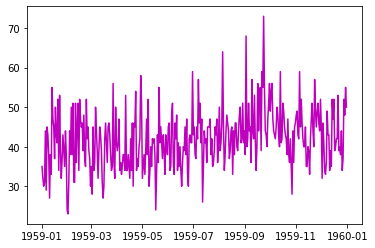

In [3]:
plt.plot(df1, c='m');plt.show()

- 비정상시계열(Non-stationary time series)인 경우

In [4]:
df2 = pd.read_csv('data5/international-airline-passengers.txt', parse_dates=['time'], index_col='time')
n = int( len(df2)/2 )
print( df2.iloc[ :n ].mean() )
print( df2.iloc[ :n ].var()  )
print( df2.iloc[ n: ].mean() )
print( df2.iloc[ n: ].var()  )

passengers    182.902778
dtype: float64
passengers    2275.69464
dtype: float64
passengers    377.694444
dtype: float64
passengers    7471.736307
dtype: float64


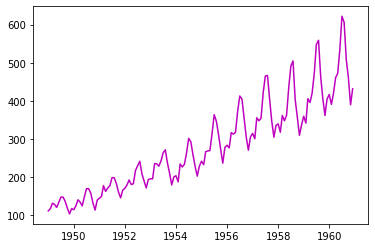

In [5]:
plt.plot(df2, c='m');plt.show()

- 정상시계열(Stationary time series)인지 비정상시계열(Non-stationary time series)인지 애매한 경우

In [6]:
df3 = pd.read_csv('data5/daily-min-temperatures.csv', parse_dates=['Date'], index_col='Date')
n = int( len(df3)/2 )
print( df3.iloc[ :n ].mean() )
print( df3.iloc[ :n ].var() )
print( df3.iloc[ n: ].mean() )
print( df3.iloc[ n: ].var() )

Temp    11.043507
dtype: float64
Temp    18.170782
dtype: float64
Temp    11.312
dtype: float64
Temp    14.961956
dtype: float64


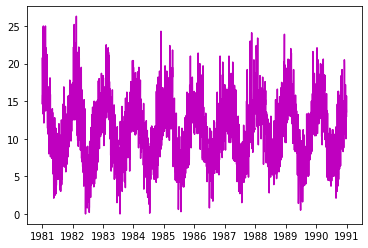

In [7]:
plt.plot(df3, c='m');plt.show()

In [8]:
df3['days'] = range( 0, len(df3) )
df3.corr()                        #  np.corrcoef( df3['Temp'], df3['days'] )

,Temp,days
Temp,1.00000,0.01218
days,0.01218,1.00000


- Lag

In [9]:
lag1 = np.corrcoef( df3['Temp'][1:], df3['Temp'][:-1] )
lag2 = np.corrcoef( df3['Temp'][2:], df3['Temp'][:-2] )
lag3 = np.corrcoef( df3['Temp'][3:], df3['Temp'][:-3] )
lag1[0,1], lag2[0,1], lag3[0,1]

(0.7748702165384456, 0.6311194620684837, 0.5863748620126278)

In [10]:
auto = []
for shift in range(1,10):
    cor = np.corrcoef( df3['Temp'][shift:], df3['Temp'][: -shift] )[1, 0]
    auto.append(cor)
auto

[0.7748702165384457,
 0.6311194620684836,
 0.5863748620126278,
 0.5788976133377621,
 0.578571574411206,
 0.5765484145122557,
 0.575928953583158,
 0.5695569780397494,
 0.5634747178408281]

- Acf

In [11]:
acf( df3['Temp'] )

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092, 0.43378232, 0.4203594 , 0.42707505, 0.42196486,
       0.4079607 ])

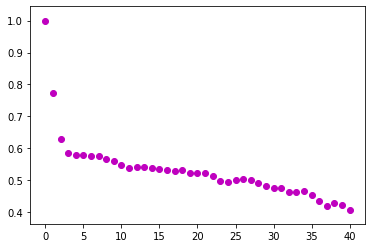

In [12]:
plt.scatter( range( 0, len(acf(df3['Temp'])) ), acf(df3['Temp']), c='m' )
plt.show()

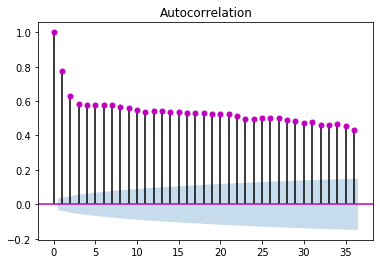

In [13]:
plot_acf( df3['Temp'],c='m' )
plt.show()

- Pacf

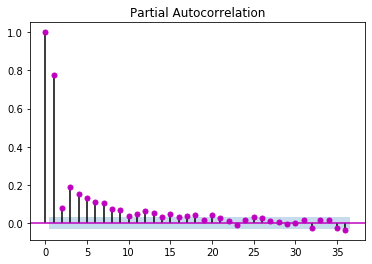

In [14]:
plot_pacf(df3['Temp'], c='m')
plt.show()

####  adfuller 판단 지표<br>

* 검증 조건 ( p-value : 유의수준 5% 이내면 Reject로 대립가설을 채택. )
    * 귀무가설($H_0$) : Non-stationary.
    * 대체가설($H_1$) : Stationary.

In [15]:
res = adfuller(df1['Births'])
print(res[0])  # adf
print(res[1])  # p-value ==> Stationary

-4.808291253559763
5.243412990149865e-05


In [16]:
res = adfuller(df2['passengers'])
print(res[0])  # adf
print(res[1])  # p-value ==> Non-stationary

0.8153688792060569
0.9918802434376411


- AR(p) : 자기 회귀 모형(Autoregressive) = ARIMA(p, 0, 0)
 <br><br>
이전 관측값의 오차항이 이후 관측값에 영향을 주는 모형이다. 

- MA(q) : 이동 평균 모형(Moving average) = ARIMA(0, 0, q)
<br><br>
관측값이 이전의 연속적인 오차항의 영향을 받는다는 모형이다. 

- ARMA(p, q) = ARIMA(p, 0, q)<br><br>
AR(p), MA(q)를 합친 모형으로, 차분을 하지 않았기 때문에 불안정한 경우가많다.

- I : Intgrated 
<br><br>
누적을 의미하는 것으로, 차분을 이용하는 시계열모형들에 붙이는 표현이라고 생각하면 편하다.

- ARIMA(p, d, q)
<br><br>
ARMA(p, q) 모형에서 I를 통해 비정상성을 제거하는 과정을 포함한 모형이다. cf) d : 차분(Diffrence) 횟수 

In [17]:
def arima_aic_check(data, order, sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [18]:
arima_aic_check( df2, [3,3,3] )

,order,AIC
21,p:2 d:1 q:2,1344.043433
20,p:2 d:1 q:1,1361.695808
13,p:1 d:1 q:2,1371.815374
15,p:1 d:2 q:2,1393.908442
23,p:2 d:2 q:2,1394.656208
7,p:0 d:2 q:2,1396.371696
19,p:2 d:1 q:0,1397.975152
4,p:0 d:1 q:2,1398.385532
3,p:0 d:1 q:1,1398.827110
12,p:1 d:1 q:1,1402.145400


In [19]:
model = ARIMA( df2,  (2,1, 2) )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.716
Date:                Wed, 27 Jan 2021   AIC                           1344.043
Time:                        12:00:34   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.passengers    -1.9097      0.065    -29.503      0.000      -2.037      -1.783
ma.L2.D.passengers     0.9995      0.068     14.807      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [20]:
model.fit().predict(1,10, typ='levels')

1949-02-01    114.531108
1949-03-01    121.350912
1949-04-01    137.221378
1949-05-01    129.789534
1949-06-01    119.169402
1949-07-01    136.762428
1949-08-01    149.739116
1949-09-01    147.367344
1949-10-01    134.798650
1949-11-01    121.076971
Freq: MS, dtype: float64

In [21]:
model.fit().predict('1950-02-01','1950-07-01', typ='levels')

1950-02-01    132.058401
1950-03-01    143.953676
1950-04-01    156.328724
1950-05-01    147.710884
1950-06-01    136.542444
1950-07-01    155.854139
Freq: MS, dtype: float64

In [22]:
train = df2[:'1960-07-01']
test  = df2['1960-07-01':]
pred  = model.fit().predict('1960-07-01','1965-12-01', typ='levels')

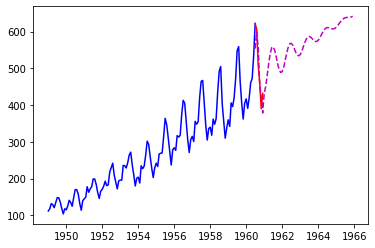

In [23]:
plt.plot( train, c='b' )
plt.plot( test, c='r' )
plt.plot( pred, 'm--')
plt.show()

#### 연습문제 

- ACF, Adufller, (2001-11-13, 2001-11-20) 예측하시오.

In [24]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')

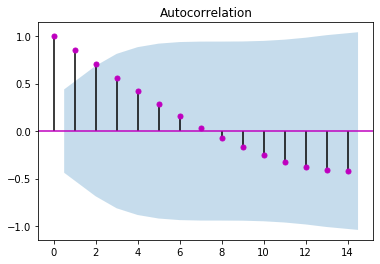

---------------------------------------------------------------------------
Adf : -7.57327
p-value : 0.0
---------------------------------------------------------------------------
         order       AIC
4  p:0 d:1 q:1 -46.51033
---------------------------------------------------------------------------


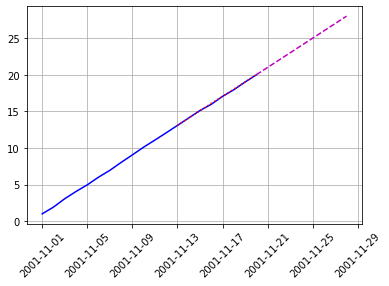

In [45]:
plot_acf( df['count'],c='m' ); plt.show()
print('-'*75)

print('Adf',':', round(adfuller(df['count'])[0], 5))  
print('p-value',':', round(adfuller(df['count'])[1], 5))
print('-'*75)

print( arima_aic_check( df, [3,3,3] ).nsmallest(1, 'AIC', keep='all') )
print('-'*75)

mod   = ARIMA( df,  (0, 1, 1) )
pred  = mod.fit().predict('2001-11-13', '2001-11-20', typ='levels')
pred1  = mod.fit().predict('2001-11-20', '2001-11-28', typ='levels')
plt.plot( df, 'b' )
plt.plot( pred, 'r:')
plt.plot( pred1, 'm--')
plt.xticks(rotation=45)
plt.grid()
plt.show()